# The `fingerprint` module

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging 

import numpy as np
import pandas as pd
from opencadd.databases.klifs import setup_remote, setup_local

from kissim.encoding import Fingerprint, FingerprintNormalized, FingerprintGenerator

INFO:opencadd.databases.klifs.api:If you want to see an non-truncated version of the DataFrames in this module, use `pd.set_option('display.max_columns', 50)` in your notebook.


In [3]:
logger = logging.getLogger("opencadd")
logger.setLevel(logging.ERROR)

## Select structure KLIFS ID

In [4]:
structure_klifs_id = 109

## Generate fingerprint from KLIFS remote session

### 1. Set up KLIFS remote session

In [5]:
KLIFS_REMOTE = setup_remote()

### 2. Generate fingerprint

In [6]:
fingerprint1 = Fingerprint.from_structure_klifs_id(structure_klifs_id, KLIFS_REMOTE)

## Generate fingerprint from KLIFS local session

### 1. Set up KLIFS local session

In [7]:
KLIFS_LOCAL = setup_local(
    "/home/dominique/Documents/GitHub/kissim_app/data/external/20201223_KLIFS_ABL2_HUMAN/"
)

### 2. Generate fingerprint

Not working yet because pocket is calculated based on mol2 files but `kissim` only uses pdb files.

In [8]:
fingerprint2 = Fingerprint.from_structure_klifs_id(structure_klifs_id, KLIFS_LOCAL)

## Test equality of fingerprints from KLIFS remote/local session

In [9]:
v1 = fingerprint1.values_array()
v2 = fingerprint2.values_array()
np.allclose(v1, v2, rtol=0, atol=0, equal_nan=True)

True

## Fingerprint

In [10]:
fingerprint = fingerprint1

### Class properties

In [11]:
fingerprint.physicochemical

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue.ix,,,,,,,,
1,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.894737
2,2.0,1.0,0.0,1.0,0.0,0.0,2.0,0.600000
3,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.259259
4,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.157895
5,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.000000
...,...,...,...,...,...,...,...,...
81,2.0,0.0,2.0,-1.0,0.0,0.0,2.0,0.655172
82,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.457143
83,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.692308


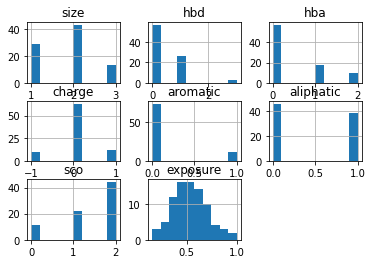

In [12]:
fingerprint.physicochemical.hist();

In [13]:
fingerprint.distances

,hinge_region,dfg_region,front_pocket,center
residue.ix,,,,
1,13.638825,18.151474,14.976771,17.175079
2,11.992615,15.466840,12.175196,14.700109
3,9.609095,14.682669,9.020685,12.176826
4,11.448428,15.794301,8.619237,12.807139
5,14.557948,17.282959,11.822055,15.756100
...,...,...,...,...
81,9.265642,7.738092,6.713789,4.406957
82,8.524595,6.593623,5.218254,4.892906
83,11.939774,6.238186,8.907651,8.120236


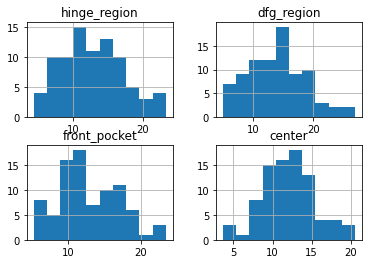

In [14]:
fingerprint.distances.hist();

In [15]:
fingerprint.moments

,hinge_region,dfg_region,front_pocket,center
moments,,,,
1,12.744560,13.951374,12.748791,12.093493
2,4.411861,4.842253,4.286651,3.403159
3,2.920390,3.377546,3.075991,1.621397


### Class methods

In [16]:
len(fingerprint.values_array())

692

In [17]:
len(fingerprint.values_array(True, True, True))

1032

### Class attributes

In [18]:
print(*fingerprint.values_dict.keys())
print(*fingerprint.values_dict["physicochemical"].keys())
print(*fingerprint.values_dict["spatial"].keys())
print(*fingerprint.values_dict["spatial"]["distances"].keys())
print(*fingerprint.values_dict["spatial"]["moments"].keys())

physicochemical spatial
size hbd hba charge aromatic aliphatic sco exposure
distances moments
hinge_region dfg_region front_pocket center
hinge_region dfg_region front_pocket center


In [19]:
print(*fingerprint.residue_ids)

292 293 294 295 296 297 298 299 300 301 302 303 304 314 315 316 317 318 319 328 329 330 331 332 333 334 335 336 337 338 339 340 342 343 344 345 346 347 348 349 350 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 425 426 427 428 429 430 431


In [20]:
print(*fingerprint.residue_ixs)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85


## Normalized fingerprint

### 1. Generate normalized fingerprint

In [21]:
fingerprint_normalized = FingerprintNormalized.from_fingerprint(fingerprint)

### 2. Compare unnormalized and normalized fingerprint bits

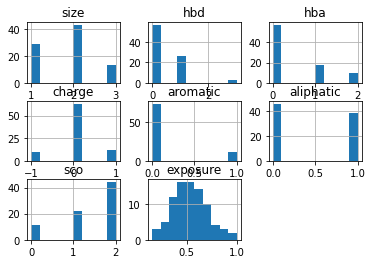

In [22]:
fingerprint.physicochemical.hist();

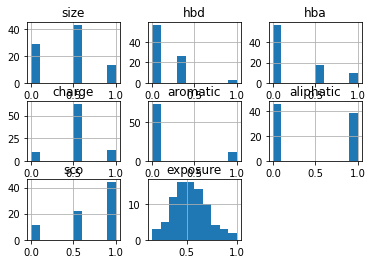

In [23]:
fingerprint_normalized.physicochemical.hist();

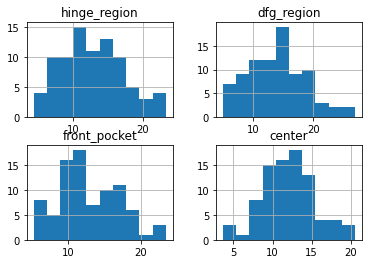

In [24]:
fingerprint.distances.hist();

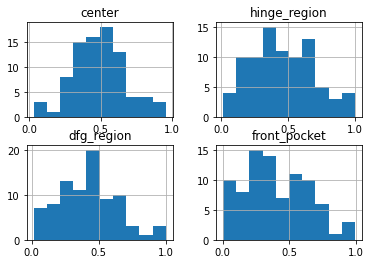

In [25]:
fingerprint_normalized.distances.hist();